In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
def dummify_func(housing):
    housing = housing.reset_index() #duplicated index values in csv need to reset
    housing = housing.drop('index', axis = 1) # drop original index with duplicates

    price = housing['SalePrice'] # Create Y Variable

    category = housing.select_dtypes('object') #Select all 'object' data types  which are all categorical

    housing_num = housing.select_dtypes('int64', 'float64') # Select numeric data types

    housing_num_PID = housing_num['PID'] # PID index should not be scaled, remove and put back later

    ## Numeric Colums to convert
    # MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MoSold, YrSold
    # How to handle MiscVal???
    #Leave YearBuilt and YearRemodAdd as numeric to be scaled

    housing_num = housing_num.drop(['PID', 'SalePrice', 'MSSubClass', 'OverallQual', \
    'OverallCond', 'MoSold', 'YrSold', 'MiscVal'], axis = 1)

    housing_num2cat = housing[['MSSubClass', 'OverallQual', 'OverallCond', \
    'MoSold', 'YrSold', 'MiscVal']]

    category = pd.concat([category, housing_num2cat.astype(str)], axis = 1) #Add all categorical features to dataframe to be dummified

    cat_dum = pd.get_dummies(category, drop_first = True)

    scaler = MinMaxScaler()
    scaler.fit(housing_num)
    housing_num_scaled = scaler.transform(housing_num)
    housing_num_scaled = pd.DataFrame(housing_num_scaled, columns = housing_num.columns)


    full_dum_data = pd.concat([housing_num_PID, housing_num, cat_dum], axis = 1) #Concatenate dummified data and numeric data

    return full_dum_data, price

In [3]:
data = pd.read_csv('Ames_HousePrice.csv', index_col=0)

In [4]:
x,y = dummify_func(data)

In [5]:
y

0       126000
1       139500
2       124900
3       114000
4       227000
         ...  
2575    121000
2576    139600
2577    145000
2578    217500
2579    215000
Name: SalePrice, Length: 2580, dtype: int64

In [6]:
y.min()

12789

In [7]:
y.max()

755000

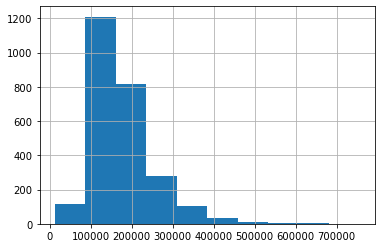

In [11]:
y.hist()

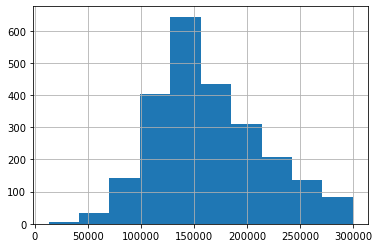

In [10]:
y[y < 300000].hist()

In [9]:
data[data.SalePrice > 600000]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
66,528164060,2470,615000,20,RL,106.0,12720,Pave,NaN,Reg,...,216,144,Ex,NaN,NaN,0,2,2008,WD,Normal
585,528150070,2364,611657,20,RL,100.0,12919,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,3,2010,New,Partial
8,528351010,4316,755000,60,RL,104.0,21535,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal
326,528320060,3627,625000,60,RL,118.0,35760,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
640,528110020,2674,610000,20,RL,105.0,13693,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal


In [20]:
data[data.GrLivArea > 4500]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
310,908154205,4676,184750,60,RL,130.0,40094,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,10,2007,New,Partial


In [19]:
data[(data.TotalBsmtSF == data['1stFlrSF']) & (data.TotalBsmtSF == data.GrLivArea)]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
7,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
11,528186170,1342,219500,120,RL,48.0,6240,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
13,902204080,861,80000,30,RM,62.0,7404,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,Oth,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,534479150,1036,112900,20,RL,63.0,7584,Pave,NaN,Reg,...,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal
754,905102170,1040,129500,20,RL,70.0,11200,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
755,532376170,890,115000,190,RL,65.0,8450,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
757,534430050,816,129800,30,RL,60.0,8550,Pave,NaN,Reg,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal


In [ ]:
(data.TotalBsmtSF == data.GrLivArea)